In [33]:
import pandas as pd  # data manipulation package
import numpy as np  # multidimensional array processing 
import matplotlib.pyplot as plt  # for data visualizations


import warnings
warnings.filterwarnings('ignore')


In [34]:
## reading the data
player_df = pd.read_csv("./ipl_data/IPL18Player.csv")

player_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,bowling_dot_balls,bowling_sixes,no_balls,balls_bowled_1_to_6,runs_conceded_1_to_6,balls_bowled_7_to_14,runs_conceded_7_to_14,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,0,0,0,0,0,0,0,1
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,0,0,0,0,0,0,0,1
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,90,29,0,0,0,126,160,195,373,1
3,214425,DJ Willey,NaN,Chennai Super Kings,3,2,484,483,0,0,...,20,3,0,24,38,6,10,30,47,1
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,118,10,2,194,236,37,42,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,116,14,0,150,177,72,107,42,49,0
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,98,20,0,78,109,222,270,42,77,0
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,0,0,0,0,0,0,0
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_id               149 non-null    int64  
 1   long_scorecard_name     149 non-null    object 
 2   Salary                  141 non-null    float64
 3   team                    149 non-null    object 
 4   matches                 149 non-null    int64  
 5   wins                    149 non-null    int64  
 6   team_runs_for           149 non-null    int64  
 7   team_runs_against       149 non-null    int64  
 8   matches_keeper          149 non-null    int64  
 9   byes_conceded           149 non-null    int64  
 10  moms                    149 non-null    int64  
 11  innings                 149 non-null    int64  
 12  not_outs                149 non-null    int64  
 13  runs                    149 non-null    int64  
 14  balls_faced             149 non-null    in

In [37]:
## drop the missing values
player_df = player_df.dropna()
player_df.shape

(141, 35)

## Summary statistics for all players

In [38]:
player_df.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,141.0,444751.432624,549625.645749,7121.0,74266.0,180612.0,452594.0,2140473.0
Salary,141.0,620200.709220,591727.013929,15000.0,156250.0,437500.0,968750.0,2656250.0
matches,141.0,9.106383,5.050746,1.0,5.0,9.0,14.0,17.0
wins,141.0,4.539007,3.085722,0.0,2.0,4.0,6.0,11.0
team_runs_for,141.0,1509.205674,847.422289,128.0,839.0,1508.0,2322.0,2809.0
team_runs_against,141.0,1510.184397,835.065469,127.0,841.0,1493.0,2282.0,2750.0
matches_keeper,141.0,0.836879,3.192903,0.0,0.0,0.0,0.0,16.0
byes_conceded,141.0,0.475177,2.099597,0.0,0.0,0.0,0.0,13.0
moms,141.0,0.425532,0.812703,0.0,0.0,0.0,1.0,4.0
innings,141.0,6.482270,5.109659,0.0,2.0,5.0,11.0,17.0


## Identifying batsmen and bowlers

- Create a dummy variable to indicate whether a player had played as a batsman.
- The variable "innings" indicates how many innings a player had batted in.

In [39]:
##adding a batsman columns to identify if that player is a batsman or not
player_df['batsman'] = np.where(player_df['innings'] > 0, 1, 0)

##adding a bowler col to identify if that player is a bowler or not
player_df['bowler'] = np.where(player_df['matches_bowled'] > 0, 1, 0)

In [40]:
player_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,no_balls,balls_bowled_1_to_6,runs_conceded_1_to_6,balls_bowled_7_to_14,runs_conceded_7_to_14,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,0,0,0,0,0,1,1,0
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,0,0,0,0,0,1,1,0
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,0,126,160,195,373,1,1,1
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,2,194,236,37,42,0,0,1,1,1
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,0,150,177,72,107,42,49,0,1,1
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,0,78,109,222,270,42,77,0,1,1
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,0,0,0,0,0,1,0
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,0,0,0,0,0,1,0


## How will you be able to pick good players from this data?

**Goal**: To build the most balanced side. 

Now, How to build the most balanced side?
You'd want to get a mix of personalities in your team. 
1. Consistently good players, 
2. hard hitters, 
3. economical bowlers
4. Wkt takers

## What are Performance measures for both batsmen and bowlers

1. **batting average = runs / the numbers of outs**
2. **batting strike rate = (runs * 100) / balls faced**
3. **bowling average = runs conceded / wicket taken**
4. **bowling strike rate = number of balls bowled / wicket taken**


*Note: if a batsman has scored runs but not been dismissed, his batting average is technically infinite. 
Similarly, if a player did not face any ball, his batting strike would be infinite and if a player did not lose any wicket, his bowling average or bowling strike would be infinite.*

There are two alternatives we will consider to deal with this issue.
1. Add 1 to the number of outs, balls faced, andn wickets taken in calculating the above variables.
2. Instead of creating the above measures, we can simply include total runs, total number of outs, and balls faced to measure a batsman's performance, and include runs conceded, number of balls bowled, and wickets taken to measure a bowler's performance.

In [8]:
##number of times a player got out
player_df['outs'] = np.where(player_df['batsman']==1, player_df['innings'] - player_df['not_outs'], 0)
player_df['outs'].describe()



count    141.000000
mean       5.000000
std        4.605897
min        0.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       16.000000
Name: outs, dtype: float64

In [9]:
## adding all the metrics to the dataframe
player_df['batting_average'] = player_df['runs'] / (player_df['outs']+1)
player_df['batting_strike'] = player_df['runs'] / ((player_df['balls_faced']+1))*100
player_df['bowling_average'] = player_df['runs_conceded'] / (player_df['wickets']+1)
player_df['bowling_strike'] = player_df['balls_bowled'] / (player_df['wickets']+1)

In [10]:
player_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,1,1,0,14,40.133333,149.379653,0.000000,0.000000
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,1,1,0,1,4.000000,80.000000,0.000000,0.000000
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,1,1,0,5,27.000000,124.615385,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,1,0,3,13.000000,126.829268,0.000000,0.000000
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,1,0,8,13.555556,118.446602,0.000000,0.000000


In [11]:
player_df['batting_average'].describe()

count    141.000000
mean      15.093066
std       13.761819
min        0.000000
25%        4.000000
50%       12.500000
75%       23.000000
max       65.000000
Name: batting_average, dtype: float64

In [12]:
player_df['batting_strike'].describe()

count    141.000000
mean     104.164456
std       53.873378
min        0.000000
25%       73.913043
50%      118.446602
75%      139.669421
max      250.000000
Name: batting_strike, dtype: float64

In [13]:
player_df['bowling_average'].describe()

count    141.000000
mean      17.493864
std       16.108488
min        0.000000
25%        0.000000
50%       20.052632
75%       27.466667
max       72.000000
Name: bowling_average, dtype: float64

In [14]:
player_df['bowling_strike'].describe()

count    141.000000
mean      11.478621
std       10.295591
min        0.000000
25%        0.000000
50%       12.500000
75%       19.600000
max       42.000000
Name: bowling_strike, dtype: float64

In [15]:
player_df['batsman'].describe()

count    141.000000
mean       0.943262
std        0.232165
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: batsman, dtype: float64

In [16]:
player_df['bowler'].describe()

count    141.000000
mean       0.631206
std        0.484198
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: bowler, dtype: float64

## Segregating the batsmen from the bowlers

In [19]:
## batsmen
bat_df = player_df[player_df['batsman'] == 1]
bat_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,1,1,0,14,40.133333,149.379653,0.000000,0.000000
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,1,1,0,1,4.000000,80.000000,0.000000,0.000000
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,1,1,0,5,27.000000,124.615385,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,1,0,3,13.000000,126.829268,0.000000,0.000000
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,1,0,8,13.555556,118.446602,0.000000,0.000000


In [20]:
## bowlers
bowl_df = player_df[player_df['bowler'] == 1]
bowl_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
6,7121,Harbhajan Singh,312500.0,Chennai Super Kings,13,8,2242,2254,0,0,...,0,0,1,1,1,3,7.250000,78.378378,33.750000,23.875000
7,19120,Imran Tahir,156250.0,Chennai Super Kings,6,4,1147,1079,0,0,...,40,36,1,1,1,0,2.000000,66.666667,26.857143,17.714286
8,1222291,KM Asif,62500.0,Chennai Super Kings,2,1,388,378,0,0,...,12,39,1,0,1,0,0.000000,0.000000,18.750000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1738090,Rashid Khan,1406250.0,Sunrisers,17,10,2721,2674,0,0,...,132,163,0,1,1,5,9.833333,184.375000,20.818182,18.545455
143,230422,S Kaul,593750.0,Sunrisers,17,10,2721,2674,0,0,...,187,236,0,1,1,3,0.750000,20.000000,24.818182,18.000000
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000


## Segregating consistent batsmen from hard hitters!

In [42]:
## consistent batsmen would have a batting avg. above 30
consistent_batsmen = bat_df[bat_df['batting_average'] > 30]
consistent_batsmen.sort_values('batting_average', ascending=False)

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
14,7561,MS Dhoni,2343750.0,Chennai Super Kings,16,11,2809,2750,16,10,...,0,0,1,1,0,6,65.000000,150.165017,0.000000,0.0
51,170187,KL Rahul,1718750.0,Kings XI Punjab,14,6,2210,2326,14,8,...,0,0,0,1,0,12,50.692308,158.033573,0.000000,0.0
99,136065,JC Buttler,687500.0,Rajasthan Royals,13,6,2049,2053,13,11,...,0,0,0,1,0,10,49.818182,154.802260,0.000000,0.0
137,159052,KS Williamson,468750.0,Sunrisers,17,10,2721,2674,0,0,...,0,0,0,1,0,14,49.000000,142.166344,0.000000,0.0
36,1065017,RR Pant,2343750.0,Delhi Daredevils,14,5,2343,2387,14,6,...,0,0,0,1,0,13,48.857143,173.164557,0.000000,0.0
109,45848,AB de Villiers,1718750.0,Royal Challengers Bangalore,12,5,1980,2054,0,0,...,0,0,0,1,0,9,48.000000,173.913043,0.000000,0.0
63,8749,KD Karthik,1156250.0,Kolkata Knight Riders,16,9,2759,2743,16,11,...,0,0,0,1,0,10,45.272727,147.337278,0.000000,0.0
127,101095,V Kohli,2656250.0,Royal Challengers Bangalore,14,6,2322,2383,0,0,...,0,0,0,1,0,11,44.166667,138.743455,0.000000,0.0
41,253651,V Shankar,500000.0,Delhi Daredevils,13,5,2204,2244,0,0,...,0,0,0,1,1,4,42.400000,142.281879,29.000000,15.0
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,1,1,0,14,40.133333,149.379653,0.000000,0.0


<Figure size 432x288 with 0 Axes>

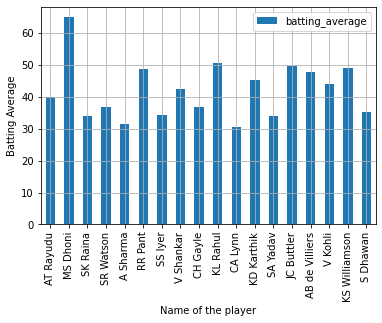

In [44]:
plt.figure()
consistent_batsmen = consistent_batsmen.set_index("long_scorecard_name")
consistent_batsmen[['batting_average']].plot(kind='bar', grid=True)
plt.xlabel("Name of the player")
plt.ylabel("Batting Average")
plt.show()

## Looking for hard-hitters - players with high batting strike rate

In [23]:
## hard hitters who score more runs in lesser number of balls
hitters = bat_df[bat_df['batting_strike'] > 170].sort_values('batting_strike', ascending=False)
hitters



,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
17,257775,SN Thakur,406250.0,Chennai Super Kings,13,9,2252,2207,0,0,...,130,244,1,1,1,0,15.000000,250.000000,25.352941,16.470588
102,1138994,K Gowtham,968750.0,Rajasthan Royals,15,7,2357,2356,0,0,...,6,6,0,1,1,9,12.600000,193.846154,26.000000,20.000000
73,97646,SP Narine,1953130.0,Kolkata Knight Riders,16,9,2759,2743,0,0,...,120,176,0,1,1,16,21.000000,188.888889,25.944444,20.333333
21,1576635,A Sharma,85940.0,Delhi Daredevils,3,2,517,478,0,0,...,0,0,0,1,0,1,31.500000,185.294118,0.000000,0.000000
140,1738090,Rashid Khan,1406250.0,Sunrisers,17,10,2721,2674,0,0,...,132,163,0,1,1,5,9.833333,184.375000,20.818182,18.545455
59,158041,AD Russell,1328130.0,Kolkata Knight Riders,16,9,2759,2743,0,0,...,66,110,0,1,1,11,26.333333,183.720930,25.357143,16.214286
29,250417,HV Patel,31250.0,Delhi Daredevils,5,2,878,845,0,0,...,27,39,0,1,1,1,30.000000,176.470588,20.875000,13.125000
109,45848,AB de Villiers,1718750.0,Royal Challengers Bangalore,12,5,1980,2054,0,0,...,0,0,0,1,0,9,48.000000,173.913043,0.000000,0.000000
36,1065017,RR Pant,2343750.0,Delhi Daredevils,14,5,2343,2387,14,6,...,0,0,0,1,0,13,48.857143,173.164557,0.000000,0.000000
24,921899,CH Morris,1718750.0,Delhi Daredevils,4,0,529,696,0,0,...,36,69,0,1,1,1,23.000000,170.370370,35.750000,21.000000


<Figure size 432x288 with 0 Axes>

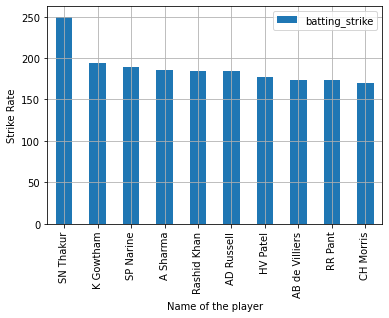

In [24]:
plt.figure()
hitters = hitters.set_index("long_scorecard_name")
hitters[['batting_strike']].plot(kind='bar', grid=True)
plt.xlabel("Name of the player")
plt.ylabel("Strike Rate")
plt.show()

## Can we have both batting average and strike rate in batsmen

In [25]:
## a combo of both
bat_df[(player_df['batting_average'] > 30) & (player_df['batting_strike'] > 150)]

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
14,7561,MS Dhoni,2343750.0,Chennai Super Kings,16,11,2809,2750,16,10,...,0,0,1,1,0,6,65.000000,150.165017,0.000000,0.0
18,10016,SR Watson,625000.0,Chennai Super Kings,15,10,2650,2597,0,0,...,24,36,1,1,1,14,37.000000,154.166667,35.857143,24.0
21,1576635,A Sharma,85940.0,Delhi Daredevils,3,2,517,478,0,0,...,0,0,0,1,0,1,31.500000,185.294118,0.000000,0.0
36,1065017,RR Pant,2343750.0,Delhi Daredevils,14,5,2343,2387,14,6,...,0,0,0,1,0,13,48.857143,173.164557,0.000000,0.0
51,170187,KL Rahul,1718750.0,Kings XI Punjab,14,6,2210,2326,14,8,...,0,0,0,1,0,12,50.692308,158.033573,0.000000,0.0
99,136065,JC Buttler,687500.0,Rajasthan Royals,13,6,2049,2053,13,11,...,0,0,0,1,0,10,49.818182,154.802260,0.000000,0.0
109,45848,AB de Villiers,1718750.0,Royal Challengers Bangalore,12,5,1980,2054,0,0,...,0,0,0,1,0,9,48.000000,173.913043,0.000000,0.0


## Segregating the economical bowlers from the wicket takers

In [26]:
##calculating the numbers for everyone 
bowl_df['economy'] = bowl_df['runs_conceded'] / bowl_df['matches']
bowl_df['economy'].describe()

count    89.000000
mean     25.295424
std      10.304884
min       0.933333
25%      20.769231
50%      26.833333
75%      32.500000
max      49.000000
Name: economy, dtype: float64

In [27]:
## economical bowlers
eco_bowlers = bowl_df[bowl_df['economy'] < 6].sort_values("economy")
eco_bowlers

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike,economy
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,1,1,9,26.000000,129.353234,7.0,6.0,0.933333
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,1,1,3,11.750000,104.444444,10.0,6.0,2.000000
135,1058801,D Hooda,562500.0,Sunrisers,9,4,1508,1524,0,0,...,0,0,1,1,4,17.400000,106.097561,24.0,18.0,2.666667
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,3,0,1,1,7,14.375000,115.000000,9.5,9.0,2.714286
58,7681,Yuvraj Singh,312500.0,Kings XI Punjab,8,5,1338,1388,0,0,...,0,0,1,1,6,9.285714,87.837838,23.0,12.0,2.875000
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,11,0,1,1,13,21.714286,130.472103,8.8,7.4,2.933333
41,253651,V Shankar,500000.0,Delhi Daredevils,13,5,2204,2244,0,0,...,0,0,1,1,4,42.400000,142.281879,29.0,15.0,4.461538
107,10421,STR Binny,78130.0,Rajasthan Royals,7,4,1096,1139,0,0,...,0,0,1,1,5,7.333333,110.000000,33.0,12.0,4.714286


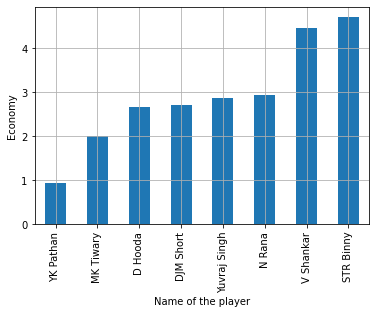

In [45]:
plt.figure()
eco_bowlers = eco_bowlers.set_index("long_scorecard_name")
eco_bowlers['economy'].plot(kind='bar', grid=True)
plt.xlabel("Name of the player")
plt.ylabel("Economy")
plt.show()

In [29]:
##wicket takers
bowl_df[bowl_df['bowling_strike'] < 10].sort_values("bowling_strike")

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike,economy
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,1,1,3,11.750000,104.444444,10.000000,6.000000,2.000000
91,255490,AN Sharma,31250.0,Rajasthan Royals,1,1,177,176,0,0,...,0,0,0,1,0,0.000000,0.000000,11.000000,6.000000,11.000000
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,1,1,9,26.000000,129.353234,7.000000,6.000000,0.933333
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,11,0,1,1,13,21.714286,130.472103,8.800000,7.400000,2.933333
68,10424,R Vinay Kumar,156250.0,Kolkata Knight Riders,2,1,379,381,0,0,...,35,0,1,1,0,6.000000,150.000000,21.666667,7.666667,32.500000
8,1222291,KM Asif,62500.0,Chennai Super Kings,2,1,388,378,0,0,...,39,1,0,1,0,0.000000,0.000000,18.750000,9.000000,37.500000
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,3,0,1,1,7,14.375000,115.000000,9.500000,9.000000,2.714286


In [30]:
## combo of both
bowl_df[(bowl_df['economy'] < 6) & (bowl_df['bowling_strike'] < 10)]

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike,economy
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,1,1,3,11.750000,104.444444,10.0,6.0,2.000000
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,11,0,1,1,13,21.714286,130.472103,8.8,7.4,2.933333
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,3,0,1,1,7,14.375000,115.000000,9.5,9.0,2.714286
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,1,1,9,26.000000,129.353234,7.0,6.0,0.933333


## All rounders

In [31]:
alrs = player_df[(player_df['batting_average'] > 10) & (player_df['bowling_average'] < 10) & (player_df['bowling_average'] > 1)]
alrs


,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,0,1,1,3,11.750000,104.444444,10.0,6.0
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,6,11,0,1,1,13,21.714286,130.472103,8.8,7.4
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,6,3,0,1,1,7,14.375000,115.000000,9.5,9.0
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,0,1,1,9,26.000000,129.353234,7.0,6.0


<Figure size 432x288 with 0 Axes>

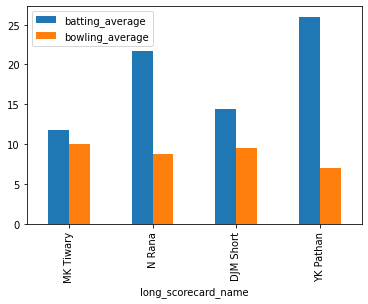

In [32]:
plt.figure()
alrs = alrs.set_index("long_scorecard_name")
alrs[['batting_average', 'bowling_average']].plot(kind='bar')

plt.show()

## Further Scope of analysis

1. Do a more granular analysis for different phases of the game. Overs 1-5, 5-10, 10-15, so on and so forth.
2. A regression analysis on studying the impact of the performance of the player on his salary.
3. Wicket keeping analysis
4. Fielding analysis - catches, etc.